# Download Fresh Data

In [7]:
# %pip install pandarallel
# %pip install swifter

In [3]:
%%time
!pocket-to-sqlite fetch "$(pwd)/data/pocket.db" #--silent "$(pwd)/data/pocket.db"

Fetching items since 1613437398
CPU times: user 10.4 ms, sys: 9.79 ms, total: 20.2 ms
Wall time: 602 ms


In [1]:
import warnings; warnings.simplefilter('ignore')
from utils import *
%matplotlib inline

conn = prepare_connection(sqlite3.connect('data/pocket.db',
                                   detect_types=sqlite3.PARSE_DECLTYPES))


[nltk_data] Downloading package stopwords to /Users/Jon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
%%time
generate_new_features()

Generating new text features..
CPU times: user 12.2 ms, sys: 15.2 ms, total: 27.5 ms
Wall time: 32.3 ms


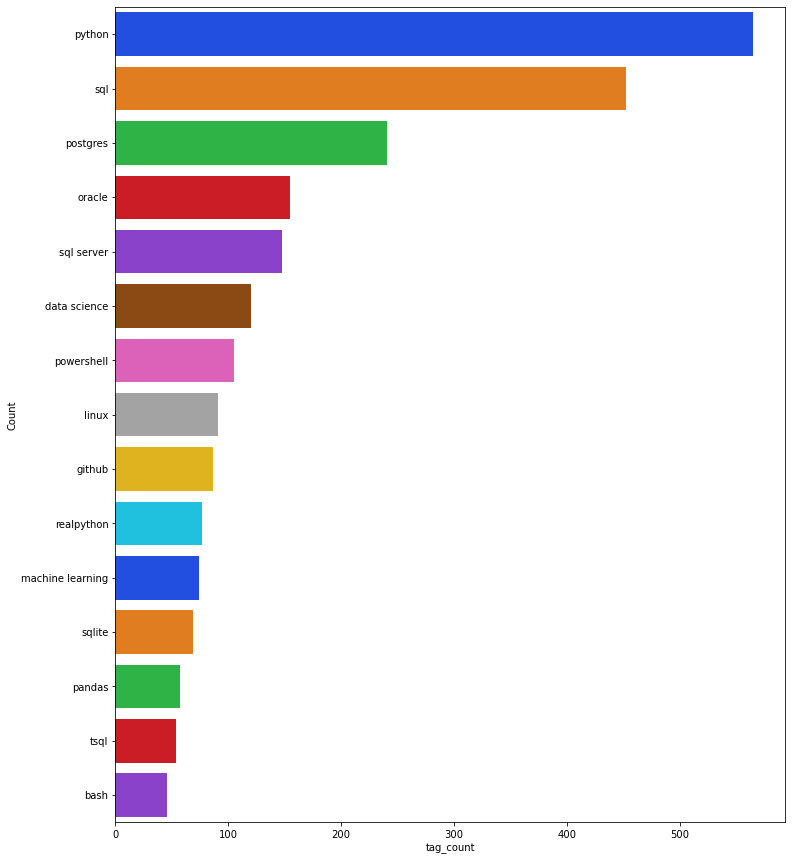

In [2]:
plot_tag_counts()

In [3]:
# plot_word_frequencies()

In [5]:
%%time
df = get_articles_df(fetch_all=True)
tdf, all_tags = prep_dataframe(df, 'combined_text')

CPU times: user 6.75 s, sys: 673 ms, total: 7.42 s
Wall time: 8.95 s


# Train Models

In [6]:
%%time 
output_df = train_models(tdf, all_tags)

TFIDF
(2645, 2953)
(1304, 2953)
Modeling
class Name: algorithms
class Name: vim
class Name: python
class Name: cli
class Name: pandas
class Name: statistics
class Name: csv
class Name: sql
class Name: dba
class Name: ios
class Name: spark
class Name: flask
class Name: cosmosdb
class Name: science
class Name: data visualization
class Name: tsql
class Name: api
class Name: windows
class Name: ipython
class Name: fullstack
class Name: java
class Name: sql tuning
class Name: linux
class Name: mbti
class Name: oracle
class Name: tutorial
class Name: testing
class Name: clr
class Name: node
class Name: machine learning
class Name: docker
class Name: apple
class Name: modules
class Name: jupyter
class Name: gui
class Name: data science
class Name: db
class Name: functional programming
class Name: jobs
class Name: excel
class Name: plot
class Name: json
class Name: web development
class Name: dataset
class Name: powershell
class Name: sql server
class Name: realpython
class Name: azure
class N

In [7]:
output = pd.merge(left=pd.merge(left=output_df, 
         right=df[['item_id', 'combined_text', 'resolved_title','resolved_url', 'tags']], 
         how='left', on=['item_id']), right=tdf[['item_id', 'tag_list']], on=['item_id'])

del output['tags']
output.head()

,item_id,combined_text,resolved_title,resolved_url,tag_list
0,73981909,every need pl sql prints something terminal traditional solution dbms output put line used probably know obstacles however absolute buffer size limit remains markus winand blog index html markus winand blog performance reliability maintainability scalability software quality quality life index h...,Pipelined Functions: Better Than DBMS_OUTPUT,http://blog.fatalmind.com/2009/11/11/pipelined-functions-better-then-dbms_output/,"[oracle, plsql, sql]"
1,2513311295,jealous go developers building executable easily shipping users great users could run application without installing anything dream pyinstaller one way get python ecosystem real python static real python logo c edea svg start start learn python python tutorials depth articles tutorials video cou...,Using PyInstaller to Easily Distribute Python Applications,https://realpython.com/pyinstaller-python/,"[python, realpython]"
2,1978017352,many entry level investors hedge funds shrouded mystery exclusivity forbidden nginx,What is a Hedge Fund?,http://www.visualcapitalist.com/what-is-a-hedge-fund/,[]
3,2984555302,mongodb popular distributed document database offers replication via homegrown consensus protocol draws inspiration raft distribute data across shards via mongos previously evaluated mongodb versions rc jepsen analyses analyses talks talks consistency consistency services services ethics ethics ...,MongoDB 4.2.6,http://jepsen.io/analyses/mongodb-4.2.6,[]
4,2330673256,azure database migration service supports migrations mongodb cosmos db mongo api sign preview capability azure cosmos db microsoft globally distributed multi model database service mission critical applications javascript void https gxcuf lithium com html assets content images globalheader micro...,Announcing Preview of MongoDB migrations to Cosmos DB Mongo API using Azure Database Migration Service,https://blogs.msdn.microsoft.com/datamigration/2018/09/21/annoucing-preview-of-mongodb-migrations-to-cosmosdb-mongo-api-using-azure-database-migration-service/,[]


# Predict New Tags

In [8]:
%%time
new_articles = get_articles_df(fetch_all=False)
prediction_df, all_tags = prep_dataframe(new_articles , 'combined_text')

CPU times: user 247 ms, sys: 164 ms, total: 411 ms
Wall time: 1.97 s


In [9]:
new_article_output = predict_new(prediction_df)

TFIDF
(4, 42539)
Modeling


In [10]:
output = pd.merge(left=pd.merge(left=new_article_output, 
         right=new_articles[['item_id', 'combined_text', 'resolved_title','resolved_url', 'tags']], 
         how='left', on=['item_id']), right=prediction_df[['item_id', 'tag_list']], on=['item_id'])

del output['tags']
output.item_id.tolist()

[2874107333, 2218288050, 3029322438, 3028625337]

In [11]:
add_new_tags()

0it [00:00, ?it/s]

Total records to process: 0


[]